In [74]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv(r"C:\Users\kanuk\OneDrive\Desktop\cognify\Dataset .csv")
print(df.columns)
df.shape
df.Cuisines

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     World Cuisine, Patisserie, Cafe
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisines, Length: 9551, dtype: object

In [75]:
cuisine_count=df['Cuisines'].str.split(',',).explode().value_counts()
top_three_cuisines=cuisine_count.head(3)
print(top_three_cuisines)

Cuisines
North Indian    2992
 Chinese        1880
 Fast Food      1314
Name: count, dtype: int64


 1.1 Determine the top three most common cuisines in the dataset.

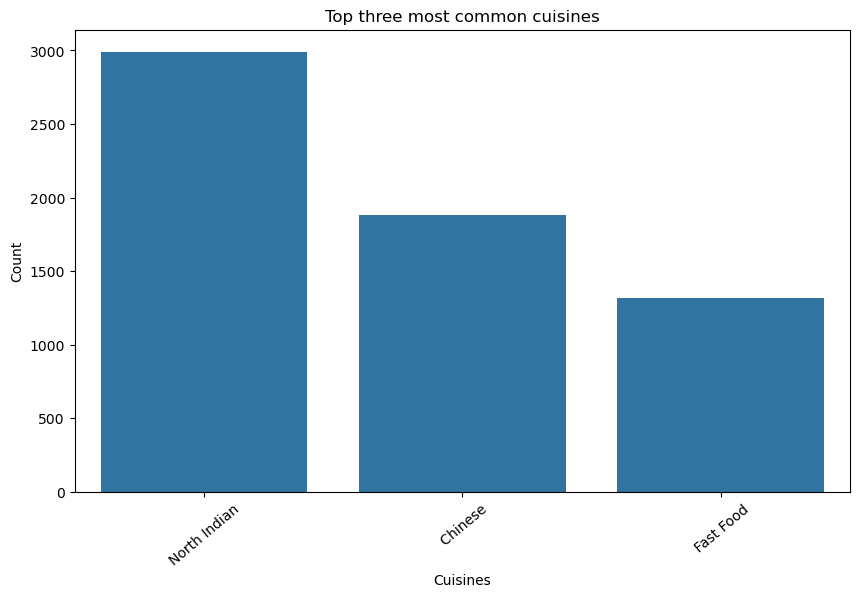

In [76]:
top_three_cuisines=top_three_cuisines.sort_values(ascending=False)
fig,Ax=plt.subplots(figsize=(10,6))
sns.barplot(x=top_three_cuisines.index,y=top_three_cuisines.values,ax=Ax)
plt.title("Top three most common cuisines")
plt.xlabel('Cuisines')
plt.ylabel('Count')
plt.xticks(rotation=40)
plt.show()

1.2 Calculate the percentage of restaurants that serve each of the top cuisines.

In [77]:
top_restaurents=len(df)
percentage_per_cuisine=(top_three_cuisines/top_restaurents)*100
print(percentage_per_cuisine)


Cuisines
North Indian    31.326563
 Chinese        19.683803
 Fast Food      13.757722
Name: count, dtype: float64


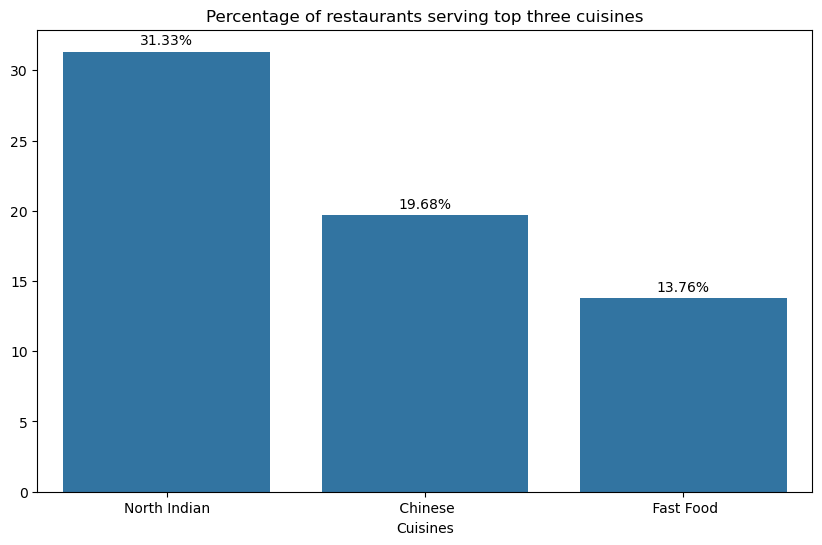

In [78]:

fig,ax=plt.subplots(figsize=(10,6))
ab=sns.barplot(x=percentage_per_cuisine.index,y=percentage_per_cuisine.values)
for bar in ab.containers[0]:
    height=bar.get_height()
    ab.annotate(f'{height:.2f}%',xy=(bar.get_x()+bar.get_width()/2,height),xytext=(0,3),textcoords='offset points',ha='center',va='bottom')
    plt.title('Percentage of restaurants serving top three cuisines')